In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
data=pd.read_csv('LGD_DATA.csv')

In [5]:
data.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096
3,151282,52,31,1,F,Married,292.430579
4,174407,20,3,1,M,Single,246.540576


In [6]:
data_new= pd.get_dummies(data, drop_first=True)
data_new.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,Gender_M,Married_Single
0,150024,24,5,1,203.319595,1,0
1,144880,31,10,1,402.197302,0,1
2,133742,56,37,1,553.132096,1,0
3,151282,52,31,1,292.430579,0,0
4,174407,20,3,1,246.540576,1,1


In [7]:
loanloss = LinearRegression()

loanloss.fit(data_new.iloc[:,[1,2,3,5,6]],data_new['Losses in Thousands'])



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
loanloss.intercept_

502.9204833236437

In [9]:
loanloss.coef_

array([ -3.80823766,  -2.43254505,  -2.69086413,  93.8563901 ,
       134.99809835])

In [10]:
data_new['Prediction']=loanloss.predict(data_new.iloc[:,[1,2,3,5,6]])

In [11]:
data_new.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,Gender_M,Married_Single,Prediction
0,150024,24,5,1,203.319595,1,0,490.525580
1,144880,31,10,1,402.197302,0,1,492.846900
2,133742,56,37,1,553.132096,1,0,290.820534
3,151282,52,31,1,292.430579,0,0,226.792364
4,174407,20,3,1,246.540576,1,1,645.621719


In [12]:
SSE=sum((data_new.Prediction-data_new['Losses in Thousands'])**2)
TSS=sum((data_new['Losses in Thousands']-np.mean(data_new['Losses in Thousands']))**2)

R2=1-(SSE/TSS)

mape= (sum(abs((data_new.Prediction-data_new['Losses in Thousands'])/data_new['Losses in Thousands'])))/len(data)

print('Rsquare is : ',R2,'\nMAPE is : ',mape)

Rsquare is :  0.3019844936813987 
MAPE is :  0.6970064185234688


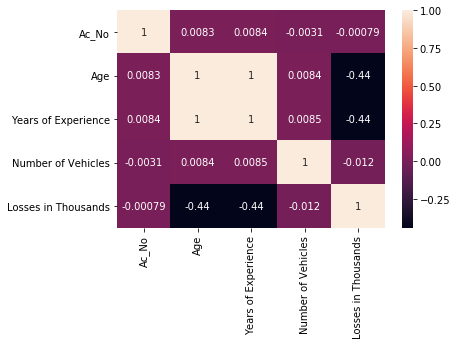

In [13]:
import seaborn as sns

sns.heatmap(data.corr(),annot=True)
plt.show()

In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x=data_new.iloc[:,[1,2,3,5,6]]

vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]


vifdf= pd.DataFrame()

vifdf['Columns'] = x.columns
vifdf['VIF values'] = vif
vifdf

NameError: name 'data_new' is not defined

In [ ]:
x.values